# NLTK

 It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification,
  tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.

In [ ]:
#import nltk
nltk.download('omw-1.4')

In [1]:
doc1 = "Sugar is bad to consume. My sister likes to have sugar, but not my father."
doc2 = "My father driving my sister around to dance practice."
doc3 = "Doctors suggest that driving may cause increased stress and blood pressure."
doc4 = "Sometimes I feel pressure to perform well at school, and father is always driving my sister to do better."
doc5 = "Health experts say that Sugar is not good for your lifestyle."
doc6 = "I am doing well at school, but my sister could study a little more."
doc7 = "Currently, I am studying at a nearby school. My father does not need driving me there."
# topics: health and sugar (doc1,doc5), driving (doc2, doc3, doc7), school (doc4, doc6, doc7)

# compile documents
doc_complete = [doc1, doc2, doc3, doc4, doc5, doc6, doc7]

In [2]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete]

## a. Tokenize and tag some text:

In [4]:
#import nltk
#!pip install fitz
!pip install pymupdf
# import fitz
# import pandas as pd 

In [ ]:
doc = fitz.open('C:\\Users\\APinto\\OneDrive\\Documentos\\pdfs cv\\BABOK Guide v3.pdf')


In [ ]:
text = page.get_text()

### Sentiment Analysis of portuguese tweets

In [106]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
import re

# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
# from wordcloud import WordCloud,STOPWORDS
# from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
# from bs4 import BeautifulSoup
# import spacy
# import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
# from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
# from textblob import TextBlob
# from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# import os
# print(os.listdir("../input"))
# import warnings
# warnings.filterwarnings('ignore')
# !pip install seaborn
# !pip install matplotlib

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\APinto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
#importing the training data
twitter_data=pd.read_csv('C:\\Test folder\\NoThemeTweets.csv')
twitter_data.head(10)

,id,tweet_text,tweet_date,sentiment,query_used
0,1031761728445530112,@Tixaa23 14 para eu ir :),Tue Aug 21 04:35:39 +0000 2018,Positivo,:)
1,1031761040462278656,@drexalvarez O meu like eu já dei na época :),Tue Aug 21 04:32:55 +0000 2018,Positivo,:)
2,1031760962372689920,Eu só queria conseguir comer alguma coisa pra ...,Tue Aug 21 04:32:37 +0000 2018,Positivo,:)
3,1031760948250456066,:D que lindo dia !,Tue Aug 21 04:32:33 +0000 2018,Positivo,:)
4,1031760895985246208,"@Primo_Resmungao Pq da pr jeito!!é uma ""oferta...",Tue Aug 21 04:32:21 +0000 2018,Positivo,:)
5,1031760822543020032,"@BadWolf_Wagner @DanieVedo Eu entendi, mas iss...",Tue Aug 21 04:32:03 +0000 2018,Positivo,:)
6,1031760780641718272,@Chyko661 @g1 [+] Carcinoma Hepatico (Cancer d...,Tue Aug 21 04:31:53 +0000 2018,Positivo,:)
7,1031760749813805058,"Aquela mina da limpeza, que tinha um marido co...",Tue Aug 21 04:31:46 +0000 2018,Positivo,:)
8,1031760690778976262,"@narryfools aqui, espero que você melhore logo...",Tue Aug 21 04:31:32 +0000 2018,Positivo,:)
9,1031760658600284160,@fefocaires se és feliz trabalhando nisso entã...,Tue Aug 21 04:31:24 +0000 2018,Positivo,:)


In [65]:
twitter_data = twitter_data[['tweet_text', 'sentiment']]
print(twitter_data.shape)
twitter_data.head(10)

(785814, 2)


,tweet_text,sentiment
0,@Tixaa23 14 para eu ir :),Positivo
1,@drexalvarez O meu like eu já dei na época :),Positivo
2,Eu só queria conseguir comer alguma coisa pra ...,Positivo
3,:D que lindo dia !,Positivo
4,"@Primo_Resmungao Pq da pr jeito!!é uma ""oferta...",Positivo
5,"@BadWolf_Wagner @DanieVedo Eu entendi, mas iss...",Positivo
6,@Chyko661 @g1 [+] Carcinoma Hepatico (Cancer d...,Positivo
7,"Aquela mina da limpeza, que tinha um marido co...",Positivo
8,"@narryfools aqui, espero que você melhore logo...",Positivo
9,@fefocaires se és feliz trabalhando nisso entã...,Positivo


In [66]:
#Summary of the dataset
twitter_data.describe()

,tweet_text,sentiment
count,785814,785814
unique,776753,2
top,Bom dia :),Negativo
freq,227,522707


In [67]:
#Label count
twitter_data['sentiment'].value_counts()

Negativo    522707
Positivo    263107
Name: sentiment, dtype: int64

In [68]:
# Balance the dataset
data_pos = twitter_data[twitter_data['sentiment'] == 'Positivo']
data_neg = twitter_data[twitter_data['sentiment'] == 'Negativo']

In [69]:
data_pos.head()

,tweet_text,sentiment
0,@Tixaa23 14 para eu ir :),Positivo
1,@drexalvarez O meu like eu já dei na época :),Positivo
2,Eu só queria conseguir comer alguma coisa pra ...,Positivo
3,:D que lindo dia !,Positivo
4,"@Primo_Resmungao Pq da pr jeito!!é uma ""oferta...",Positivo


In [70]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [71]:
data_pos.head()

,tweet_text,sentiment
0,@Tixaa23 14 para eu ir :),Positivo
1,@drexalvarez O meu like eu já dei na época :),Positivo
2,Eu só queria conseguir comer alguma coisa pra ...,Positivo
3,:D que lindo dia !,Positivo
4,"@Primo_Resmungao Pq da pr jeito!!é uma ""oferta...",Positivo


In [75]:

twitter_data = pd.concat([data_pos, data_neg])
twitter_data = twitter_data.sample(frac=1).reset_index()
twitter_data.tail()

,index,tweet_text,sentiment
39995,1495,E o remember? Can we start now ? — Um remember...,Positivo
39996,15285,Correção ainda tenho :),Positivo
39997,13584,para :) de :) llorar :) pelotuda :) to: me fro...,Positivo
39998,8782,@maisasilva pavê de leite ninho é top tbm :p,Positivo
39999,87733,@ga_medeiros71 Vá ajuda a Nono :(,Negativo


In [76]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('portuguese')

In [34]:
import string
# for c in string.punctuation:
#     print("[" + c + "]")

In [77]:
#lowercase
twitter_data['tweet_text']=twitter_data['tweet_text'].str.lower()
twitter_data['tweet_text'].tail()

39995    e o remember? can we start now ? — um remember...
39996                              correção ainda tenho :)
39997    para :) de :) llorar :) pelotuda :) to: me fro...
39998         @maisasilva pavê de leite ninho é top tbm :p
39999                    @ga_medeiros71 vá ajuda a nono :(
Name: tweet_text, dtype: object

In [78]:
#Remove punctuation
def cleaning_punctuations(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
twitter_data['tweet_text']=twitter_data['tweet_text'].apply(lambda x: cleaning_punctuations(x))
twitter_data['tweet_text'].tail()

39995    e o remember can we start now  — um remember a...
39996                                correção ainda tenho 
39997            para  de  llorar  pelotuda  to me from me
39998           maisasilva pavê de leite ninho é top tbm p
39999                        gamedeiros71 vá ajuda a nono 
Name: tweet_text, dtype: object

In [79]:
# Cleaning and removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
twitter_data['tweet_text'] = twitter_data['tweet_text'].apply(lambda x: cleaning_repeating_char(x))
twitter_data['tweet_text'].tail()

39995    e o remember can we start now  — um remember a...
39996                                correção ainda tenho 
39997            para  de  llorar  pelotuda  to me from me
39998           maisasilva pavê de leite ninho é top tbm p
39999                         gamedeiros1 vá ajuda a nono 
Name: tweet_text, dtype: object

In [80]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
twitter_data['tweet_text'] = twitter_data['tweet_text'].apply(lambda x: cleaning_numbers(x))
twitter_data['tweet_text'].tail()

39995    e o remember can we start now  — um remember a...
39996                                correção ainda tenho 
39997            para  de  llorar  pelotuda  to me from me
39998           maisasilva pavê de leite ninho é top tbm p
39999                          gamedeiros vá ajuda a nono 
Name: tweet_text, dtype: object

In [81]:

#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
twitter_data['tweet_text']=twitter_data['tweet_text'].apply(simple_stemmer)

twitter_data['tweet_text'].tail()

In [83]:
#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
twitter_data['tweet_text'] =twitter_data['tweet_text'].apply(remove_stopwords)
twitter_data['tweet_text'].tail()

39995    rememb can we start now — rememb dua pessoa es...
39996                                       correção ainda
39997                              llorar pelotuda to from
39998                 maisasilva pavê leit ninho top tbm p
39999                              gamedeiro vá ajuda nono
Name: tweet_text, dtype: object

In [84]:
# Spliting the training dataset
X_train, X_test, y_train, y_test = train_test_split(twitter_data['tweet_text'], twitter_data['sentiment'], test_size=0.33)

In [85]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(26800,) (13200,) (26800,) (13200,)


In [87]:
X_train.head()

21348    queria convidar nflcantada nfldazueira serrate...
28110    littleblueski poi sei q bom ter gnt q gosta me...
14759                                      sexualcc ta bem
15633                             angelbuffay brunozor ano
38075                          rr acho nunca vi ma és giro
Name: tweet_text, dtype: object

### Transforming Dataset using TF-IDF Vectorizer

In [90]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  189944


C:\Users\APinto\anaconda3\envs\projeto_apspacy\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [91]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [92]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### Modelling

#### Bernoulli

              precision    recall  f1-score   support

    Negativo       0.61      0.94      0.74      6587
    Positivo       0.86      0.40      0.55      6613

    accuracy                           0.67     13200
   macro avg       0.73      0.67      0.64     13200
weighted avg       0.74      0.67      0.64     13200

bnb_tfidf_score : 0.6671212121212121


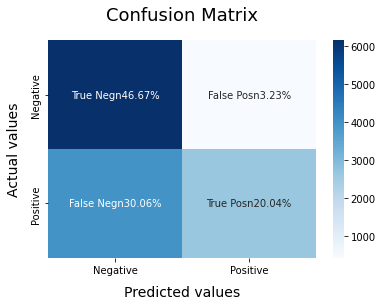

In [104]:
BNBmodel = BernoulliNB()
bnbmodel = BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)

y_pred1 = BNBmodel.predict(X_test)
BNB_tfidf_score=accuracy_score(y_test,y_pred1)
print("bnb_tfidf_score :",BNB_tfidf_score)

##### SVC MODEL

              precision    recall  f1-score   support

    Negativo       0.75      0.75      0.75      6587
    Positivo       0.75      0.75      0.75      6613

    accuracy                           0.75     13200
   macro avg       0.75      0.75      0.75     13200
weighted avg       0.75      0.75      0.75     13200

svc_tfidf_score : 0.751969696969697


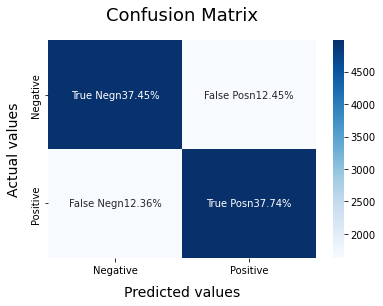

In [107]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)
SVC_tfidf_score=accuracy_score(y_test,y_pred2)
print("svc_tfidf_score :",SVC_tfidf_score)

In [ ]:
#### Logistic Regression

              precision    recall  f1-score   support

    Negativo       0.75      0.74      0.75      6587
    Positivo       0.74      0.76      0.75      6613

    accuracy                           0.75     13200
   macro avg       0.75      0.75      0.75     13200
weighted avg       0.75      0.75      0.75     13200

lr_tfidf_score : 0.7490151515151515


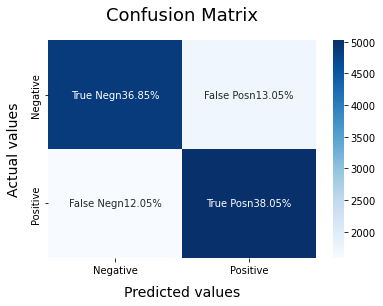

In [108]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)
LR_tfidf_score=accuracy_score(y_test,y_pred3)
print("lr_tfidf_score :",LR_tfidf_score)